# Lab 1, Assignment 1 - Simulating an acrobot 

##  EL2820 Modelling of Dynamical Systems

Group members: JAVIER LÓPEZ INIESTA DÍAZ DEL CAMPO & LUKAS RAPP


Group number: 5

In this home-work assignment, you will simulate an "acrobot" (see figure below), which is a simple robot consisting of two bars, of masses $m_1$, $m_2$ and lengths $l_1$, $l_2$, respectively, joined by an elbow. The top bar has one of its ends hooked to a fixed support. A motor is connected to the elbow between the two bars, and it can provide an external torque $\tau$. The figure also shows the coordinate system used to describe the positions of the joints and the centers of mass of the bars (denoted by the circles in the middle of each bar), as well as the angle that each bar makes with respect to the negative $y$-axis.

<center> <img src="img.jpg" width="400"> </center>

## Instructions

**The goal of this assignment is to derive a model of an acrobot, and to use it to complete a simulation code.** To this end, we will consider the acrobot as two rigid bodies, whose position and orientation will be described by the coordinates of their center of mass and the angles $\theta_1$ and $\theta_2$. The constraints will be modelled as very stiff springs. The resulting model will not have a minimal number of states, but it can be simplified using the techniques covered in Topic 4 (**not** used in this assignment).

**Note:** Use only techniques covered in the course (no Lagrangian/Hamiltonian mechanics nor bond graphs). The provided answers should be well motivated.

1. Inspect the code below. You will be asked later to modify only one function named `step`.
2. Derive a model of the acrobot, based on the parameters stated in the code below, by solving the tasks below sequentially. This model will subsequently be used to simulate the dynamics of the acrobot.
3. When you consider the assignment done, submit the notebook on Canvas. To facilitate the grading, please *don't* rename the notebook. That is, submit a file named `acrobot.ipynb`.

### Task 1 - Derivation of the dynamical system

### Task 1a

*Write down the equations for balance of linear momentum in each bar (in $x$ and $y$ dimensions), in terms of the components of the force $F_s$ exerted by the support on bar 1, and the force $T$ exerted by bar 2 on bar 1. Do not forget the gravitational force exerted on each bar.*

**Write your answer in the cell below.**  (Hint: you can write equations in "Latex mode", for example, $\dot{x} = \dots$; to show them, execute this block to compile the text.)

$\dot{p}_{1x}=F_{sx}+T_{x}$ 

$\dot{p}_{1y}= F_{sy} + T_y -m_1\cdot g$ 

$\dot{p}_{2x}=-T_{x}$ 

$\dot{p}_{2y}= -T_y -m_2\cdot g$

### Task 1b
*Write down the equations for balance of angular momentum of bars 1 and 2, in terms of the torques generated by $F_s$ and $T$.*

**Write your answer in the cell below.** 

<center> <img src="sketch1.png" width="550"> </center>

<center> <b>Figure 1:</b> Sketch to calculate the total torque in bar 1.<center>

Amount of forces directed perpendicularly to bar 1 (s. figure 1)

$T_{\text{x} \perp } = \cos(\Theta_1) T_{\text{x}}$

$T_{\text{y} \perp } = \sin(\Theta_1) T_{\text{y}}$

$F_{\text{sx} \perp } = \cos(\Theta_1) F_{\text{sx}}$

$F_{\text{sy} \perp } = \sin(\Theta_1) F_{\text{sy}}$

This results in the following total torque applied to bar 1:

$\dot{L}_1 = \dfrac{l_1}{2}\left(+ T_{\text{x} \perp } + T_{\text{y} \perp } - F_{\text{sx} \perp } -F_{\text{sy} \perp }   \right)+ \tau\\
= \dfrac{l_1}{2}\cdot T_x \cdot \cos(\theta_1) + \dfrac{l_1}{2}\cdot T_y \cdot \sin(\theta_1) - \dfrac{l_1}{2}\cdot \cos(\theta_1) \cdot F_{sx} - \dfrac{l_1}{2}\cdot \sin(\theta_1) \cdot F_{sy}  + \tau $



<center> <img src="sketch2.png" width="450"> </center>

<center> <b> Figure 2: </b>  Sketch to calculate the total torque in bar 2.<center>

Amount of forces directed perpendicularly to bar 2 (s. figure 2)

$T_{\text{x} \perp } = \cos(\Theta_2) T_{\text{x}}$

$T_{\text{y} \perp } = \sin(\Theta_2) T_{\text{y}}$

This results in the following total torque applied to bar 2:

$\dot{L}_2 = \dfrac{l_2}{2} (-(-T_{\text{x} \perp }) -(-T_{\text{y} \perp })) - \tau \\ = \dfrac{l_2}{2}\cdot T_x \cdot \cos(\theta_2) + \dfrac{l_2}{2}\cdot T_y \cdot \sin(\theta_2) - \tau $

### Task 1c
*Write down expressions for the $x-$ and $y-$ components of the position of the center of mass of bars 1 and 2, in terms of linear momentum of those bars.*

**Write your answer in the cell below.** 

$\dot{x}_1 = \dfrac{p_{1x}}{m_1}$

$\dot{y}_1 = \dfrac{p_{1y}}{m_1}$

$\dot{x}_2 = \dfrac{p_{2x}}{m_2}$

$\dot{y}_2 = \dfrac{p_{2x}}{m_2}$

### Task 1d
*Write down equations for the angles of the bars 1 and 2, with respect to the vertical position, in terms of their angular momenta and their moments of inertia $J_1$ and $J_2$.*

**Write your answer in the cell below.** 

$\dot{\theta}_1=\dfrac{L_1}{J_1}$

$\dot{\theta}_2=\dfrac{L_2}{J_2}$

### Task 1e

*Derive expressions for $F_s$ and $T$, by considering the two bars as very stiff springs (of constant $1/\varepsilon$, with $0 < \varepsilon \ll 1$). Hint: compute the $x-$ and $y-$ coordinates of the ends of each bar; the components of $F_s$ and $T$ should be proportional to the distance between the components of these ends.*

**Write your answer in the cell below.** 

$T_x = \dfrac{1}{\epsilon}\cdot \left[\left(x_2 - \dfrac{l_2}{2}\cdot \sin(\theta_2)\right)-\left(x_1 + \dfrac{l_1}{2}\cdot \sin(\theta_1)\right)\right]$

$T_y = \dfrac{1}{\epsilon}\cdot \left[\left(y_2 + \dfrac{l_2}{2}\cdot \cos(\theta_2)\right)-\left(y_1 - \dfrac{l_1}{2}\cdot \cos(\theta_1)\right)\right]$

$F_{sx} = - \dfrac{1}{\epsilon}\cdot \left[x_1 - \dfrac{l_1}{2}\cdot \sin(\theta_1)\right]$

$F_{sy} = - \dfrac{1}{\epsilon}\cdot \left[y_1 + \dfrac{l_1}{2}\cdot \cos(\theta_1)\right]$


### Task 2 - Implement the dynamics
*Implement your model in the function `step` (by replacing the lines "# FILL IN!"), given in the Code section below. This function should use the global variables `x1`, `y1`, `x2`, `y2`, `p1x`, `p2x`, `p1y`, `p2y`, `L1`, `L2`, `th1` and `th2` (defined in the code) as state variables and update them via the derivatives you provided in Task 1. To update the state variables, use the Forward Euler discretization scheme for ODE's.*

### Task 3 - Run the simulation
*Run each code block (following the corresponding instructions), and play with the simulation. Save a picture of a pendulum state you find interesting by pressing the s-key. For instance, you can try to get the rods to point upwards. To include the screenshot in the report, rerun the cell below after the picture been saved to include it in the submission.* 

<center> <img src="screenshot.jpeg" width="400"> </center>

<center>  <b> Figure 3. </b> A snapshot of the simulated acrobot.<center>

### Task 4 - Validation of the model

*What are the possible equilibrium points of the acrobot? Are they stable, marginally stable or unstable? Does the simulation agree with your answers? Explain. (Do not perform a linearization of the model: a qualitative argument is enough.)*

**Write your answer in the cell below.** 

In the equilibrium state, all the derivatives are 0: 

$0=\dfrac{L_1}{J_1} \rightarrow L_1 = 0$

$0=\dfrac{L_2}{J_2} \rightarrow L_1 = 0$

$0 = \dfrac{p_{1x}}{m_1} \rightarrow p_{1x}=0$

$0 = \dfrac{p_{1y}}{m_1} \rightarrow p_{1y}=0$

$0 = \dfrac{p_{2x}}{m_2} \rightarrow p_{2x}=0$

$0 = \dfrac{p_{2x}}{m_2} \rightarrow p_{2y}=0$

$0=-T_{x} \rightarrow T_x = 0$ 

$0=F_{sx}+T_{x} \rightarrow F_{sx} = 0 $ 

$0= -T_y -m_2\cdot g \rightarrow T_y = -m_2\cdot g $

$0= F_{sy} + T_y -m_1\cdot g \rightarrow F_{sy} = g\cdot (m_1 + m_2)$ 

$0 = + \dfrac{l_2}{2}\cdot T_y \cdot \sin(\theta_2) - \tau \rightarrow \sin(\theta_2) = - \dfrac{2 \cdot \tau}{l_2 \cdot m_2 \cdot g} \rightarrow |\theta_2| \leq 1 \rightarrow |\tau| \leq + \dfrac{l_2 \cdot m_2 \cdot g}{2} $

$ 0 = 0 + \dfrac{l_1}{2}\cdot (-m_2\cdot g) \cdot \sin(\theta_1) - \dfrac{l_1}{2}\cdot \sin(\theta_1) \cdot (g\cdot (m_1 + m_2))  + \tau \rightarrow \sin(\theta_1) = + \dfrac{2 \cdot \tau}{l_1 \cdot g \cdot (m_1 + 2\cdot m_2)}\\ \rightarrow |\theta_1| \leq 1 \rightarrow |\tau| \leq + \dfrac{l_1 \cdot g \cdot (m_1 + 2\cdot m_2)}{2}$

And the 4 different solutions are: 

$\theta^{01}_{1}=\arcsin \left( \dfrac{2 \cdot \tau}{l_1 \cdot g \cdot (m_1 + 2\cdot m_2)}\right)$

$\theta^{02}_{1}= \pi - \theta^{01}_{1} $

$\theta^{01}_{2}=\arcsin \left( -\dfrac{2 \cdot \tau}{l_1 \cdot g \cdot m_2}\right)$

$\theta^{02}_{2}= \pi - \theta^{01}_{2} $


Therefore, as we can see in figure 3 the equilibrium points are:

<center> <img src="sketch3.png" width="700"> </center>

<center> <b> Figure 3: </b>  Sketch of equilibrium points<center>

* The equilibrium point 1: $\theta^{01}_{1}$ and $\theta^{01}_{2}$ is **marginally stable**.
* The equilibrium point 2: $\theta^{01}_{1}$ and $\theta^{01}_{1}$ is **unstable**.
* The equilibrium point 3: $\theta^{02}_{1}$ and $\theta^{01}_{2}$ is **unstable**.
* The equilibrium point 4: $\theta^{02}_{1}$ and $\theta^{01}_{1}$ is **unstable**.

In our simulation is difficult to reach some equilibrium points. Nevertheless, at the beginning of the simulation it starts oscillating in a equilibrium point 1 $\left(\theta^{01}_{1} \; and \; \theta^{01}_{2}\right)$, so it is marginally stable because its poles are in the imaginary axis. In this way, we have sinusidal oscillations, with a constant amplitude.

On the other hand, the other equilibrium points are unstable. We can see this by considering the case where no torque is applied. In this case equilibrium point 2, 3 and 4 have at least one bar which is pointing upwards. It's easy to see that this bar will swing away from the equilibrium point if it moves by a small distance. Hence, the points are unstable.

If the torque is not 0, the position if the bars is swifted compared to system without torque but again one bar is pointing upwards resulting in a unstable equilibrium point.

*Are the dominant time constants of the simulation "reasonable"? (Hint: Find out (on the web or other resources) the period of oscillation of a bar pendulum of length $l$ for small amplitudes. Is it similar to what you observe in the simulations?)*

We removed the second bar in the simulation code and measured the period of oscillation $T$ of the first bar without the influence of the second one and obtained:

$T_{\text{measured}} \approx 6.3 \;  [s]$

According to the literature (https://en.wikipedia.org/wiki/Pendulum) the period of oscillation of a bar pendulum of length $l$ for small amplitudes is:

$T_{\text{theory}} \approx 2 \pi \sqrt{\dfrac{l_1}{g}} = 6.35\;  [s]$

This result agrees pretty well with the measured result.

*Should the total energy of the system be conserved when no external torque is applied? Why? Does this agree with your simulations? Explain.*

**Write your answer in the cell below.** 

Theory:

In theory, the Forward Euler discretization scheme doesn't conserve energy in general if the time period $\Delta t$ between two simulation points is finite.
We can see this, by considering the following toy example:

<center> <img src="sketch4.png" width="350"> </center>

<center> <b> Figure 4: </b>  Toy example showing that the simulation doesn't conserve the total energy.<center>

At time $t_1$ the mass is moving towards the spring with stiffness $D$  with velocity $v_1$ and the spring is not compressed. Hence, no force $F$ is applied on the mass and after one simulation step $t_2$ the mass is at position $v_1 \cdot \Delta t$ and has the same velocity $v_1$. Hence, the total energy of the system is increased by $\dfrac{1}{2} D (v_1 \cdot \Delta t)^2$ and not conserved.

Practice:
We analyzed the conservation of energy by analyzing the total energy of the system. At the start, both bars are in there top position.
During the simulation, we calculated the total energy of the system for every time step using the following equations:

$E = E_{kin,trans \, 1} + E_{kin,trans\,2} + E_{kin,rot \,1}+ E_{kin,rot \,2} +E_{p\,1} + E_{p\,2} = \dfrac{p_{1x}^2 + p_{1y}^2}{2\cdot m_1} + \dfrac{p_{2x}^2 + p_{2y}^2}{2\cdot m_2} + \dfrac{L_1^2}{2 \cdot J_1} + \dfrac{L_2^2}{2 \cdot J_2} + m_1\cdot y_1 \cdot g + m_2\cdot y_2 \cdot g $

$E_{spring} = \dfrac{1}{2} \cdot \dfrac{1}{\epsilon}\cdot \left[\left( x_2 - \left(\dfrac{l_2}{2}\right) \cdot \sin(\theta_2)\right) - \left( x_1 + \left(\dfrac{l_1}{2}\right) \cdot \sin(\theta_1)\right)\right]^2 \\ + \dfrac{1}{2} \cdot \dfrac{1}{\epsilon}\cdot \left[\left( y_2 + \left(\dfrac{l_2}{2}\right) \cdot \cos(\theta_2)\right) - \left( y_1 -\left(\dfrac{l_1}{2}\right) \cdot \cos(\theta_1)\right)\right]^2 \\ + \dfrac{1}{2} \cdot \dfrac{1}{\epsilon}\cdot \left[\left( x_1 - \left(\dfrac{l_1}{2}\right) \cdot \sin(\theta_1)\right)\right]^2 \\ + \dfrac{1}{2} \cdot \dfrac{1}{\epsilon}\cdot \left[\left( y_1 + \left(\dfrac{l_1}{2}\right) \cdot \cos(\theta_1)\right)\right]^2$


$E_{total} = E + E_{spring}$

Figure 4 shows the total energy plotted over simulation time. We see that the energy is approximatly conserved when no torques are applied. The fluctuations of the total energy are with $\pm 0.2 \; [J]$ very small compared to the total energy of the system which is $4000 \; [J]$.

<center> <img src="output.png" width="500"> </center>

<center> <b> Figure 4: </b> Total energy<center>

## Code

The next code block imports the necessary libraries for executing this notebook.

In [34]:
"""Do NOT change anything here"""

from numpy import sin, cos
import numpy as np
import time
import pygame

<br>

**The simulation**

You can send the Torque input to the acrobot through Keyboard. 'w' supplies +1 Nm Torque to the joints and 'a' sends -1 Nm Torque to the joints.


Let us initialize the parameters and variables required for simulating this system:

In [43]:
"""Do NOT change anything here"""

global l1, l2, m1, m2, g, ee, origin, J1, J2

# Parameters of the acrobot
l1     = 10.0                    # Length of the top bar in m
l2     = 10.0                    # Length of the bottom bar in m
m1     = 10.0                    # Mass of the top bar 1 in Kg
m2     = 10.0                    # Mass of the bottom bar 2 in Kg
g      = 9.8                     # Gravitational acceleration in m/s^2
ee     = 1e-7                    # Singular perturbation constant
origin = (0, 0)                  # (x,y) coordination of the origin
J1     = m1*(l1**2)/12           # Moment of inertia of the top bar 
J2     = m2*(l2**2)/12           # Moment of inertia of the bottom bar

# Initial conditions of the variables 
(x1, y1)     = (0,  +l1/2)# (0.0, -l1/2)      # Location of the centre of mass of the top bar 
(x2, y2)     = (0, +l1+(l2/2)) #(0.0, -l1-(l2/2)) # Location of the centre of mass of the bottom bar
Fsx          = 0.0        
Fsy          = 0.0        
Tx           = 0.0                    
Ty           = 0.0 
p1x          = 0.0               # Linear momentum in x direction of the top bar
p1y          = 0.0               # Linear momentum in y direction of the top bar
p2x          = 0.0               # Linear momentum in x direction of the bottom bar
p2y          = 0.0               # Linear momentum in y direction of the bottom bar
L1           = 0.0               # Angular momentum w.r.t center of mass of the top bar
L2           = 0.0               # Angular momentum w.r.t center of mass of the bottom bar
th1          = np.pi# 0.0               # Angle of the top bar
th2          = np.pi#0.0               # Angle of the bottom bar
tau1         = 1000.0            # Torque input for the top bar
tau2         = 1000.0            # Torque input for the bottom bar
time_elapsed = 0.0               # A counter for the time elapsed

# Colors
black = (0, 0, 0)
white = (255, 255, 255) 
red   = (255, 0, 0) 
green = (0, 255, 0) 
blue  = (0, 0, 128)

<br>

*position():* This function is used to compute the (x, y) coordinates of the Acrobot arms

In [44]:
"""Do NOT change anything here"""

def position():
    x = np.cumsum([origin[0], l1 * sin(th1), l2 * sin(th2)])
    y = np.cumsum([origin[1], -l1 * cos(th1), -l2 * cos(th2)])
    return (x, y)

<br>

*step():* This function updates the state variables of the acrobot.

In [45]:
def step(dt):
    """executes one time step of length dt"""
    global Fsx, Fsy, Tx, Ty, x1, y1, x2, y2, p1x, p2x, p1y, p2y, L1, L2, th1, th2, time_elapsed

    # Computation of the forces Fs and T
    Tx = (1 / ee) * ((x2 - (l2 / 2) * sin(th2)) - (x1 + (l1 / 2) * sin(th1)))
    Ty = (1 / ee) * ((y2 + (l2 / 2) * cos(th2)) - (y1 - (l1 / 2) * cos(th1)))
    Fsx = -(1 / ee) * (x1 - (l1 / 2) * sin(th1))
    Fsy = -(1 / ee) * (y1 + (l1 / 2) * cos(th1))

    
    # Update linear momentum and position of center of mass of the top bar
    p1x_dot = Fsx + Tx
    p1x += p1x_dot * dt
    p1y_dot = + Fsy + Ty - m1 * g
    p1y += p1y_dot * dt

    x1 += (p1x / m1) * dt
    y1 += (p1y / m1) * dt

    # Update the angular momentum and angle of the top bar
    L1_dot = + (l1/2)*Tx*cos(th1) + (l1/2)*Ty*sin(th1) - (l1 / 2) * Fsx * cos(th1) - (l1 / 2) * Fsy * sin(th1) + tau1
    L1 += L1_dot * dt
    th1 += (L1 / J1) * dt

    # Update linear momentum and position of center of mass of the bottom bar
    p2x_dot = -Tx
    p2x += p2x_dot * dt
    p2y_dot = - Ty - m2*g
    p2y += p2y_dot * dt

    x2 += (p2x/m2)*dt
    y2 += (p2y/m2)*dt

    # Update the angular momentum and angle of the bottom bar
    L2_dot = + (l2/2)*Tx*cos(th2) + (l2/2)*Ty*sin(th2) - tau2
    L2 += L2_dot * dt
    th2 += (L2/J2)*dt
    
    # Update elapsed time
    time_elapsed += dt

    # Calculate the total energy of system

    energy = (p1x**2+p1y**2) / (2*m1) + (p2x**2+p2y**2) / (2*m2) + L1**2 /(2*J1) + L2**2 /(2*J2) + m1 * (y1+l1/2) * g + m2 * (y2+l1+(l2/2)) * g
    energy_springs = \
        0.5 * (1 / ee) * ((x2 - (l2 / 2) * sin(th2)) - (x1 + (l1 / 2) * sin(th1)))**2 \
        + 0.5 * (1 / ee) * ((y2 + (l2 / 2) * cos(th2)) - (y1 - (l1 / 2) * cos(th1)))**2 \
        + 0.5 * (1 / ee) * (x1 - (l1 / 2) * sin(th1))**2 + 0.5 * (1 / ee) * (y1 + (l1 / 2) * cos(th1))**2

    return energy,  energy_springs

<br>
Below is the main simulation cell that iteratively calls the `step`-function and visualize the updates in a plot.

<br>
<br>

*Keyboard commands:*
- 'w' supplies a +1 Nm Torque to the joints 
- 'a' supplies a -1 Nm Torque to the joints 
- 'q' quits the program
- 's' saves the figure as a TGA file "screenshot.tga"

In [46]:
"""Do NOT change anything here"""

# Main simulation code

dt = 0.0001

energy_list = []
energy_list_spring = []

pygame.init()
screen_width  = 500
screen_height = 500
screen = pygame.display.set_mode((screen_width, screen_height))
screen.fill(white)
pygame.display.flip()

xs_ini, ys_ini = position()
pygame.display.set_caption('time = %.4f' % time_elapsed)

start_time = time.time()
i = 1
running = True
while(running):
    energy, energy_spring = step(dt)
    if (i*dt)%0.025 == 0:
        i = 0
        xs, ys = position()

        # Drawing
        screen.fill(white)
        pygame.draw.line(screen, blue, (int(screen_width/2+10*xs[0]),int(screen_height/2-10*ys[0])), \
                                       (int(screen_width/2+10*xs[1]),int(screen_height/2-10*ys[1])),4)
        pygame.draw.line(screen, blue, (int(screen_width/2+10*xs[1]),int(screen_height/2-10*ys[1])), \
                                       (int(screen_width/2+10*xs[2]),int(screen_height/2-10*ys[2])),4)
        pygame.draw.circle(screen, red, (int(screen_width/2+10*xs[0]),int(screen_height/2-10*ys[0])),7)
        pygame.draw.circle(screen, blue, (int(screen_width/2+10*xs[1]),int(screen_height/2-10*ys[1])),7)
        pygame.draw.circle(screen, blue, (int(screen_width/2+10*xs[2]),int(screen_height/2-10*ys[2])),7)
        pygame.display.flip()
        
        pygame.display.set_caption('time = %.4f' % time_elapsed)
        pygame.display.update()
        end_time = time.time()
        time.sleep(max(0.025-(end_time-start_time),0))
        start_time = time.time()
        
        # Keyboard handling

        tau1 = 0.0
        tau2 = 0.0
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                running = False
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_q:
                    pygame.quit()
                    running = False                        
                if event.key == pygame.K_w:
                    tau1 = 1000.0
                    tau2 = 1000.0
                if event.key == pygame.K_a:
                    tau1 = -1000.0
                    tau2 = -1000.0
                if event.key == pygame.K_s:
                    pygame.image.save(screen,'screenshot.jpeg')

        energy_list.append(energy)
        energy_list_spring.append(energy_spring)
        

    if np.round(time_elapsed, 2) == 1000.00:
        pygame.quit()
        running = False
    i = i + 1

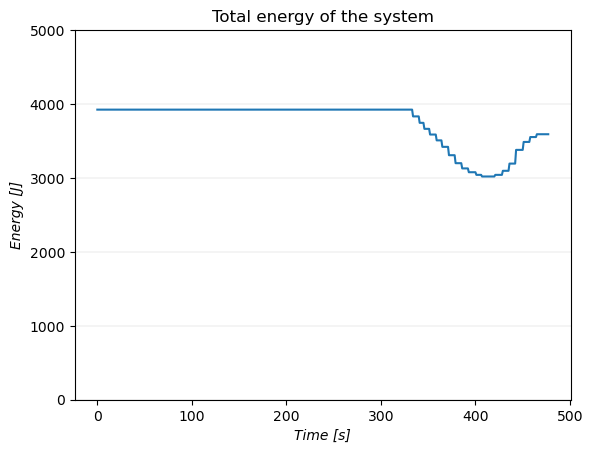

In [51]:
import matplotlib.pyplot as plt

energy_total = [e1 + e2 for e1, e2 in zip(energy_list, energy_list_spring)]

plt.ylim(0, 5000)

plt.grid(color = '0.7', axis = 'y', linestyle= '-', linewidth=.2)

plt.xlabel('Time [s]', verticalalignment ='top', fontstyle ='italic', size='10', color ="#000000")

plt.ylabel('Energy [J]', verticalalignment='bottom', fontstyle = 'italic', size='10', color = "#000000")

plt.title("Total energy of the system")

plt.plot(energy_total)
plt.show()


(3924.0, 3924.5)

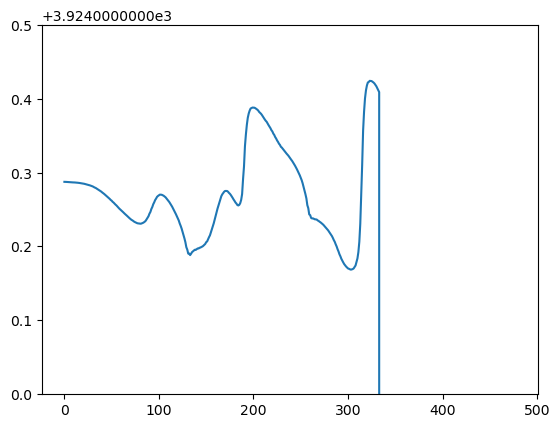

In [61]:
import matplotlib.pyplot as plt

plt.figure()
energy_total = [e1 + e2 for e1, e2 in zip(energy_list, energy_list_spring)]
plt.plot(energy_total)
#plt.ylim(0, 5000)
plt.ylim([3924, 3924.5])

In [ ]:
''